<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/---CNN_sentiment_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime

x = datetime.datetime.now()
print(x)

2024-02-22 11:21:06.145842


In [29]:

import numpy as np
np.set_printoptions(linewidth=5000)    # domyślnie = 75

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/dane/sentiment'

filepath_dict = {'yelp': '/content/drive/MyDrive/dane/sentiment/yelp_labelled.txt',
                 'amazon': '/content/drive/MyDrive/dane/sentiment/amazon_cells_labelled.txt',
                 'imdb': '/content/drive/MyDrive/dane/sentiment/imdb_labelled.txt'}


In [3]:

df_list = []
for source, filepath in filepath_dict.items():
   df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
   # Dodaj kolejną kolumnę wypełnioną nazwą źródła
   df['source'] = source
   df_list.append(df)
   df = pd.concat(df_list)



In [5]:
print(df.head(10))

                                            sentence  label source
0                           Wow... Loved this place.      1   yelp
1                                 Crust is not good.      0   yelp
2          Not tasty and the texture was just nasty.      0   yelp
3  Stopped by during the late May bank holiday of...      1   yelp
4  The selection on the menu was great and so wer...      1   yelp
5     Now I am getting angry and I want my damn pho.      0   yelp
6              Honeslty it didn't taste THAT fresh.)      0   yelp
7  The potatoes were like rubber and you could te...      0   yelp
8                          The fries were great too.      1   yelp
9                                     A great touch.      1   yelp


In [6]:
df.shape

(2748, 3)

In [7]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [8]:
df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values



In [12]:
sentences[:10]

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.'], dtype=object)

In [14]:
y[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [15]:
sentences_train,sentences_test,y_train,y_test = train_test_split(sentences, y,
                                                                 test_size=0.25,
                                                                random_state=1000)

In [16]:
sentences_train[:10]

array(['The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.',
       'Sorry, I will not be getting food from here anytime soon :(',
       'Of all the dishes, the salmon was the best, but all were great.',
       'The fries were not hot, and neither was my burger.',
       "In fact I'm going to round up to 4 stars, just because she was so awesome.",
       'Will go back next trip out.',
       'This was my first crawfish experience, and it was delicious!',
       "I could barely stomach the meal, but didn't complain because it was a business lunch.",
       'A great way to finish a great.',
       'Best service and food ever, Maria our server was so good and friendly she made our day.'],
      dtype=object)

In [17]:
sentences_train.shape

(750,)

In [19]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(sentences_train)

In [20]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)


In [62]:
X_train[:5]

array([[  1,  10,   3, 282, 739,  25,   8, 208,  30,  64, 459, 230,  13,   1, 124,   5, 231,   8,  58,   5,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [740,   4,  46,  12,  20, 160,  10,  72,  35, 355, 232,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [22]:
vocab_size = len(tokenizer.word_index) + 1 # Dodanie 1 z powodu zarezerwowanego indeksu 0
vocab_size


1747

In [23]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [33]:
X_train[:5]

array([[  1,  10,   3, 282, 739,  25,   8, 208,  30,  64, 459, 230,  13,   1, 124,   5, 231,   8,  58,   5,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [740,   4,  46,  12,  20, 160,  10,  72,  35, 355, 232,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [34]:
sentences_test[1]

"If you are reading this please don't go there."

In [35]:
y_test[1]

0

**Symulacja procesu EMBEDDING**

Jako autonomiczna warstwa
W definicji samego modelu ten proces zostanie włączony jak predefiniowana warstwa

In [36]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):

    vocab_size = len(word_index) + 1
    # Ponowne dodanie 1 z powodu zarezerwowanego indeksu 0
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [37]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/dane/sentiment/glove.6B.50d.txt',
                                            tokenizer.word_index,
                                            embedding_dim)


In [38]:
embedding_matrix.shape

(1747, 50)

In [39]:
embedding_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.18000013e-01,  2.49679998e-01, -4.12420005e-01,  1.21699996e-01,  3.45270008e-01, -4.44569997e-02, -4.96879995e-01, -1.78619996e-0

**Budowa modelu**

Warstwa Embedding() zastępuje działania symulowane powyżej

In [40]:
from keras.models import Sequential
from keras import layers


In [42]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) # zamiast symulowanje powyżej
model.add(layers.Conv1D(128, 5, activation='relu')) # 128 filtrów (kanałów konowlucji)
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          174700    
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 240129 (938.00 KB)
Trainable params: 240129 (938.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________

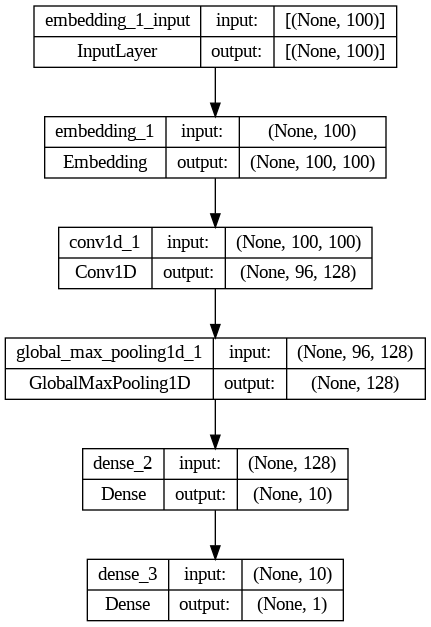

In [44]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot01.png', show_shapes=True, show_layer_names=True)

In [45]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/10
75/75 [==============================] - 2s 18ms/step - loss: 0.6829 - accuracy: 0.5787 - val_loss: 0.6619 - val_accuracy: 0.6720
Epoch 2/10
75/75 [==============================] - 1s 8ms/step - loss: 0.4989 - accuracy: 0.8640 - val_loss: 0.4812 - val_accuracy: 0.7840
Epoch 3/10
75/75 [==============================] - 1s 10ms/step - loss: 0.1781 - accuracy: 0.9467 - val_loss: 0.4608 - val_accuracy: 0.8160
Epoch 4/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0541 - accuracy: 0.9867 - val_loss: 0.4612 - val_accuracy: 0.8080
Epoch 5/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0149 - accuracy: 0.9987 - val_loss: 0.5222 - val_accuracy: 0.8000
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.5603 - val_accuracy: 0.8040
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5828 - val_accuracy: 0.8080
Epoch 8/10
75/75

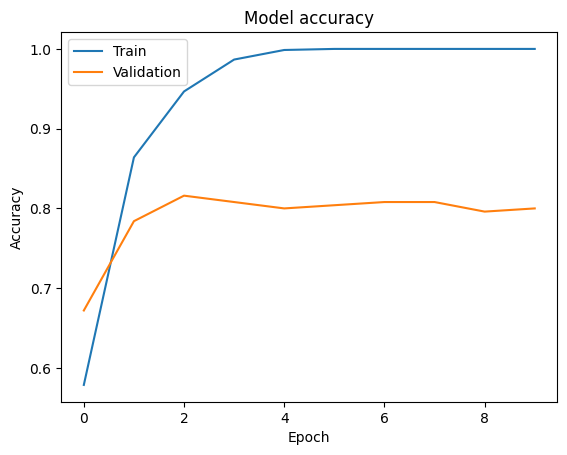

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
# predykcja dla całego zbioru testowego
Y_pred = model.predict(X_test)

8/8 [==============================] - 0s 9ms/step


In [61]:
# Raport klasyfikacji

from sklearn.metrics import classification_report
yy=Y_pred.round()

print(classification_report(y_test, yy))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       120
           1       0.82      0.78      0.80       130

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

